In [1]:
# 1.Importing all the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import randint
from gensim.models import KeyedVectors
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
from imblearn.under_sampling import RandomUnderSampler
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import neighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.optimizers import SGD
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from keras.optimizers import RMSprop
from tensorflow import keras
import multiprocessing
cores = multiprocessing.cpu_count()
# from tqdm import tqdm
# tqdm.pandas(desc="progress-bar")
from sklearn import utils
from keras.utils import to_categorical
import warnings
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
# import emoji
!pip install contractions
import contractions
from sklearn.metrics import classification_report
import os
from os.path import join, exists
from keras.utils.data_utils import get_file
import sys
import time
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from collections import Counter
from collections import defaultdict
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
def confusion_matrix(cnf_matrix):    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return 


In [3]:
# function to extract only words, by excluding punctuation and other symbols
def clean_data(review):
    review = review.lower() # convert text to lower-case
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', review) # remove URLs
    review = re.sub('@[^\s]+', 'AT_USER', review) # remove usernames
    review = re.sub(r'#([^\s]+)', r'\1', review) # remove the # in #hashtag
    review = re.sub(r'\W', ' ', review) # Remove all the special characters
    review= re.sub(r'\s+[a-zA-Z]\s+', ' ', review)  # remove all single characters  
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review)  # Remove single characters from the start
    review = re.sub(r'\s+', ' ', review, flags=re.I)# Substituting multiple spaces with single space
    review =  re.sub(r"\d", "", review) #Removing Digits
    review = re.sub(r"^\s+", "", review) #Removing Spaces from Start and End
    review = contractions.fix(review) #to change words like "don't" to "do not"
    review = re.sub("([^\x00-\x7F])+"," ",review) #removing non-english words
#     review = word_tokenize(review) 
#     review = remove_stop_words(review) #remove stop words
#     review = ' '.join(review)
    return review

# #function to remove  stopwords
# StopWords_path = 'http://www.site.uottawa.ca/~diana/csi5180/StopWords'
# StopWords = pd.read_csv(StopWords_path, header=None)
# english_stop_words = StopWords[0].values.tolist()
# # english_stop_words = stopwords.words('english')
# def remove_stop_words(corpus):
#     removed_stop_words = []
#     for review in corpus:
#         removed_stop_words.append(
#             ''.join([word for word in review.split() 
#                       if word not in english_stop_words])
#         )
#     removed_stop_words = list(filter(lambda x: x != '', removed_stop_words))
#     return removed_stop_words


def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [4]:
def plotting(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()   

In [5]:
def undersampleData(train_X, train_y):
    rus = RandomUnderSampler(random_state=0)
    X_resampled, y_resampled = rus.fit_resample(train_X, train_y)
    return X_resampled, y_resampled

In [6]:
Data_path = 'questions.csv'
Data = pd.read_csv(Data_path)

In [7]:
embedding_dim = 300
max_features = 5000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 100 # max number of words in a question to use

In [8]:
Data.drop(Data[Data.isnull().any(axis=1)].index,inplace=True)
Data['question1'] = Data['question1'].astype('str')
Data['question2'] = Data['question2'].astype('str')
train, test = train_test_split(Data, test_size=0.1)
train, validation = train_test_split(train, test_size=0.1)

In [9]:
train['question1'] = train.question1.apply(clean_data)
train['question2'] = train.question2.apply(clean_data)
test['question1'] = test.question1.apply(clean_data)
test['question2'] = test.question2.apply(clean_data)

In [10]:
wiki_url = 'https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip'
wiki_filename = 'wiki-news-300d-1M.vec.zip'
wiki_loc = join(wiki_filename)

if not exists(wiki_loc):
    print('Download %s' % wiki_filename)
    get_file(wiki_filename, wiki_url, cache_dir='.', extract=True)

Download wiki-news-300d-1M.vec.zip


In [10]:
EMBEDDING_FILE = 'datasets/wiki-news-300d-1M.vec'
embeddings = {}

print('Extract %s' % EMBEDDING_FILE)
with open(EMBEDDING_FILE, 'r',encoding = "utf-8") as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings[word] = embedding
        
print('Embeddings size: %d' % len(embeddings))

Extract datasets/wiki-news-300d-1M.vec
Embeddings size: 999995


In [12]:
print("Train Data Shape:",train.shape)
print("Validation Data Shape:",validation.shape)
print("Test Data Shape :",test.shape)

print("Train Data : \n",train["is_duplicate"].value_counts())
print("\nValidation Data : \n",validation["is_duplicate"].value_counts())
print("\nTest Data :\n",test["is_duplicate"].value_counts())

Train Data Shape: (327521, 6)
Validation Data Shape: (36392, 6)
Test Data Shape : (40435, 6)
Train Data : 
 0    206740
1    120781
Name: is_duplicate, dtype: int64

Validation Data : 
 0    22839
1    13553
Name: is_duplicate, dtype: int64

Test Data :
 0    25463
1    14972
Name: is_duplicate, dtype: int64


In [13]:
train_sentence1 = train['question1'].values
train_sentence2 = train['question2'].values

validation_sentence1 = validation['question1'].values
validation_sentence2 = validation['question2'].values

test_sentence1 = test['question1'].values
test_sentence2 = test['question2'].values

In [14]:
NUM_WORDS = len(embeddings)

print('Found %s samples.' % len(train_sentence1))

train_sentences = train_sentence1 + train_sentence2

tokenizer = Tokenizer(num_words = NUM_WORDS)
tokenizer.fit_on_texts(train_sentences)

sentence1_word_sequences = tokenizer.texts_to_sequences(train_sentence1)
sentence2_word_sequences = tokenizer.texts_to_sequences(train_sentence2)

validation_sentence1_word_sequences = tokenizer.texts_to_sequences(validation_sentence1)
validation_sentence2_word_sequences = tokenizer.texts_to_sequences(validation_sentence2)

test_sentence1_word_sequences = tokenizer.texts_to_sequences(test_sentence1)
test_sentence2_word_sequences = tokenizer.texts_to_sequences(test_sentence2)


word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 327521 samples.
Found 73339 unique tokens.


In [15]:
words_len = min(NUM_WORDS, len(word_index))
word_embedding_matrix = np.random.random((words_len + 1, embedding_dim))
k = 0
for word, i in word_index.items():
    if i >= NUM_WORDS:
        continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        word_embedding_matrix[i] = embedding_vector
        k += 1

In [16]:
len(embeddings)

999995

In [17]:
word_embedding_matrix.shape

(73340, 300)

In [18]:
word_embedding_matrix

array([[ 0.90052038,  0.20688539,  0.58861172, ...,  0.1902339 ,
         0.58299546,  0.6270166 ],
       [ 0.0897    ,  0.016     , -0.0571    , ...,  0.1559    ,
        -0.0254    , -0.0259    ],
       [-0.0754    , -0.002     ,  0.0343    , ...,  0.2511    ,
         0.0671    ,  0.0017    ],
       ...,
       [ 0.70825582,  0.0892322 ,  0.1902443 , ...,  0.48538054,
         0.69105499,  0.89896581],
       [-0.0449    ,  0.3326    ,  0.25819999, ...,  0.1099    ,
        -0.0296    ,  0.0909    ],
       [-0.1016    ,  0.097     , -0.31740001, ...,  0.0629    ,
        -0.12909999,  0.0391    ]])

In [19]:
word_embedding_matrix.shape

(73340, 300)

In [20]:
len(word_embedding_matrix[0])

300

In [21]:
inp = Input(shape=(maxlen,))
x = Embedding(len(word_index) +1, embedding_dim, weights=[word_embedding_matrix])(inp)
x = Bidirectional(LSTM(100, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

W0413 15:10:55.085551 16848 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0413 15:10:55.112475 16848 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0413 15:10:55.117462 16848 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0413 15:10:55.132421 16848 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0413 15:10:55.134416 16848 deprecation_wrapper.py:119] 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 300)          22002000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 200)          320800    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                3216      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17  

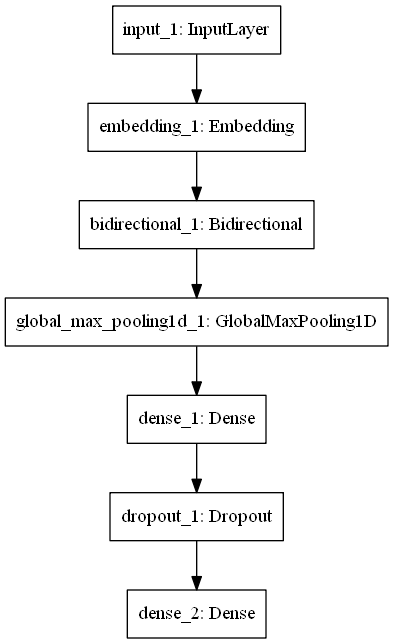

In [22]:
import pydot
# from keras.utils.vis_utils import plot_model
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
tf.keras.utils.plot_model(model, to_file = 'model.png', show_shapes=False)
# Image(filename ='model.png')

In [23]:
train_s1 = pad_sequences(sentence1_word_sequences, maxlen = maxlen)
train_s2 = pad_sequences(sentence2_word_sequences, maxlen = maxlen)
validation_s1 = pad_sequences(validation_sentence1_word_sequences, maxlen = maxlen)
validation_s2 = pad_sequences(validation_sentence2_word_sequences, maxlen = maxlen)
test_s1 = pad_sequences(test_sentence1_word_sequences, maxlen = maxlen)
test_s2 = pad_sequences(test_sentence2_word_sequences, maxlen = maxlen)


In [24]:
validation_label = validation["is_duplicate"].values
test_label = test["is_duplicate"].values


In [25]:
X_train = train_s1 + train_s2
y_train = train["is_duplicate"].values
X_resampled, y_resampled = undersampleData(X_train, y_train)


Train Data Shape: (241562, 100)
Train Data : 
 1    120781
0    120781
Name: 0, dtype: int64


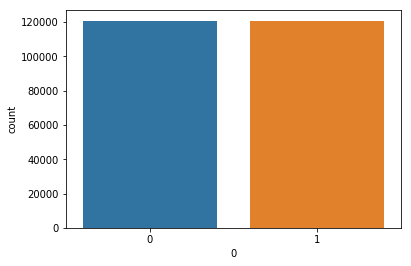

In [26]:
print("Train Data Shape:",X_resampled.shape)
y = pd.DataFrame(y_resampled)
print("Train Data : \n",y[0].value_counts())

sns.countplot(y[0],label="Count")
plt.show()

Train on 241562 samples, validate on 36392 samples
Epoch 1/10
241562/241562 [==============================] - 244s 1ms/step - loss: 0.6120 - acc: 0.6615 - val_loss: 0.5759 - val_acc: 0.6945
Epoch 2/10
241562/241562 [==============================] - 356s 1ms/step - loss: 0.5426 - acc: 0.7276 - val_loss: 0.5750 - val_acc: 0.6905
Epoch 3/10
241562/241562 [==============================] - 262s 1ms/step - loss: 0.4842 - acc: 0.7690 - val_loss: 0.6081 - val_acc: 0.6755
Epoch 4/10
241562/241562 [==============================] - 278s 1ms/step - loss: 0.4194 - acc: 0.8066 - val_loss: 0.6091 - val_acc: 0.6932
Epoch 5/10
241562/241562 [==============================] - 288s 1ms/step - loss: 0.3573 - acc: 0.8393 - val_loss: 0.6803 - val_acc: 0.6848
Epoch 6/10
241562/241562 [==============================] - 289s 1ms/step - loss: 0.3032 - acc: 0.8660 - val_loss: 0.8134 - val_acc: 0.6749
Epoch 7/10
241562/241562 [==============================] - 348s 1ms/step - loss: 0.2580 - acc: 0.8871 - val_

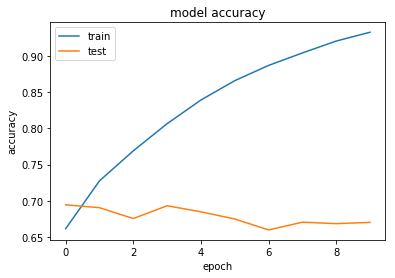

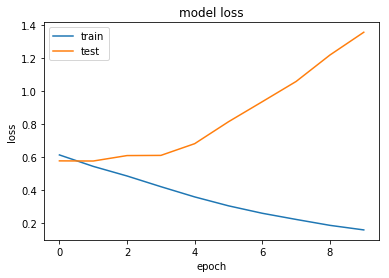

In [27]:
history = model.fit(X_resampled, y_resampled, batch_size=1024, epochs=10, validation_data=(validation_s1 + validation_s2, validation_label))
plotting(history)


In [28]:
loss, acc = model.evaluate(validation_s1 + validation_s2, validation_label , verbose=1)
print('Validation Accuracy: %f' % (acc*100))

36392/36392 [==============================] - 505s 14ms/step
Validation Accuracy: 67.020224


In [29]:
test_label_pred = model.predict(test_s1 + test_s2, batch_size=32, verbose=1)

print("Accuracy:",metrics.accuracy_score(test_label, test_label_pred.round()))

40435/40435 [==============================] - 423s 10ms/step
Accuracy: 0.679015704216644


              precision    recall  f1-score   support

           0       0.81      0.64      0.72     25463
           1       0.55      0.74      0.63     14972

    accuracy                           0.68     40435
   macro avg       0.68      0.69      0.67     40435
weighted avg       0.71      0.68      0.68     40435



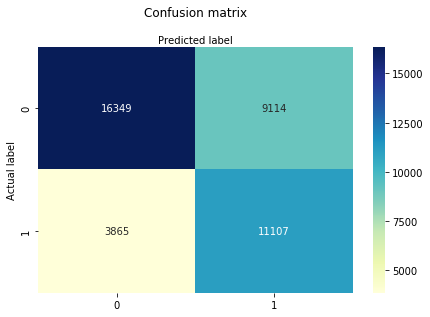

In [30]:
test["Predicted Output"] = test_label_pred
print(classification_report(test["is_duplicate"], test_label_pred.round()))
cnf_matrix = metrics.confusion_matrix(test["is_duplicate"], test_label_pred.round())
confusion_matrix(cnf_matrix)